# Lunardini analytial solution
    -Author: Niccolò Tubini, Stephan Gruber, Riccardo Rigon
    -License: Creative Commons 4.0
    
This notebook presents the comparison between the Lunardini analytical solution and the numerical solution obtained with FreThaw1D. FreThaw1D is a 1D semi-implicit finite volume solver for the enthalpy - or conservative - form of the heat equation. FreThaw1D implements the nested Newton-Casulli-Zanolli algorithm to linearize the nonlinear system of equation resulting from the numerical approximation of the govering equation.

The time step integration is $3600$ [s] and the grid spacing is $0.01$ [m].

    - References
- [Casulli, Vincenzo, and Paola Zanolli. "A nested Newton-type algorithm for finite volume methods solving Richards' equation in mixed form." SIAM Journal on Scientific Computing 32.4 (2010): 2255-2273.](https://doi.org/10.1137/100786320)
- [McKenzie, Jeffrey M., Clifford I. Voss, and Donald I. Siegel. "Groundwater flow with energy transport and water–ice phase change: numerical simulations, benchmarks, and application to freezing in peat bogs." Advances in water resources 30.4 (2007): 966-983.](https://doi.org/10.1016/j.advwatres.2006.08.008)
- [INTERFROST test case 1](https://wiki.lsce.ipsl.fr/interfrost/doku.php?id=test_cases:one)


In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rc
%matplotlib inline
import matplotlib.style as style 
import math
import xarray as xr
from my_plot import set_size
import warnings
warnings.filterwarnings('ignore')

style.available
# style.use('seaborn-poster') #sets the size of the charts
# style.use('ggplot')
style.use('seaborn-whitegrid')


nice_fonts = {
        "legend.frameon": True,
        "legend.fancybox": True,
        "legend.facecolor": "white",
        "axes.edgecolor": "0.8",
        "axes.linewidth": 0.6,
        "grid.linewidth":0.4,
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 14,
        "font.size": 14,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 12,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
}

plt.rcParams.update(nice_fonts)

oms_project_path = os.path.dirname(os.getcwd())
plot_folder = (oms_project_path+'/plots')
save_figure = False

C:\Users\Niccolo\Anaconda3\envs\geoframe_vicenza\lib\site-packages\xarray\core\merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
# style.available

In [3]:
oms_project_path

'C:\\Users\\Niccolo\\OMS\\OMS_Project_FreThaw1D'

In [5]:
os.chdir(oms_project_path+'\\output')
# os.listdir()

In [6]:
    
with xr.open_dataset('LunardiniAnalytical_minus_4C_3600s.nc', engine='scipy') as ds_4:
    print('read')
    
with xr.open_dataset('LunardiniAnalytical_minus_1C_3600s.nc', engine='scipy') as ds_1:
    print('read')
    
with xr.open_dataset('LunardiniAnalytical_minus_01C_3600s.nc', engine='scipy') as ds_01:
    print('read')

read
read
read


## Define parameter to compute the analytical solution.
Parameters are provided by the [INTERFROST project](https://wiki.lsce.ipsl.fr/interfrost/doku.php?id=test_cases:one)

In [7]:
## Test T_m = -0.1 [C]
T0 = 4
Ts = -6
Tf = 0
Tm_01 = -0.1#-4 #-1
k1 = 3.462696
k2 = 2.939946
k3 = 2.417196
C1 = 690030
C2 = 690030
C3 = 690030
xif = 0.0782
xi0 = 0.2
delta_xi = xi0-xif
Lf = 334560
gamma_d = 1680
gamma_01 = 5.616156 # 2.062
psi_01 = 0.158751 # 0.1375
alpha4_01 = k2/(C2+gamma_d*Lf*delta_xi/(Tf-Tm_01))

alpha1_01 = k1/C1
alpha3_01 = k3/C3


## Test T_m = -1 [C]
T0 = 4
Ts = -6
Tf = 0
Tm_1 = -1#-4 #-1
k1 = 3.462696
k2 = 2.939946
k3 = 2.417196
C1 = 690030
C2 = 690030
C3 = 690030
xif = 0.0782
xi0 = 0.2
delta_xi = xi0-xif
Lf = 334560
gamma_d = 1680
gamma_1 = 2.060039 # 2.062
psi_1 = 0.137387 # 0.1375
alpha4_1 = k2/(C2+gamma_d*Lf*delta_xi/(Tf-Tm_1))

## Test T_m = -4 [C]
T0 = 4
Ts = -6
Tf = 0
Tm_4 = -4 #-1
k1 = 3.462696
k2 = 2.939946
k3 = 2.417196
C1 = 690030
C2 = 690030
C3 = 690030
xif = 0.0782
xi0 = 0.2
delta_xi = xi0-xif
Lf = 334560
gamma_d = 1680
gamma_4 = 1.397316 # 2.062
psi_4 = 0.061727 # 0.1375
alpha4_4 = k2/(C2+gamma_d*Lf*delta_xi/(Tf-Tm_4))

alpha1 = k1/C1
alpha3 = k3/C3



############
# TMAX = 100*24 #2137
xx = ds_4.z.values[:]
IMAX = len(xx)


T = np.zeros(IMAX)
T_ice = np.zeros(IMAX)
T_mushy = np.zeros(IMAX)
T_liquidus = np.zeros(IMAX)
x_ice = np.zeros(IMAX)
x_mushy = np.zeros(IMAX)
x_liquidus = np.zeros(IMAX)


# solution at time t [s]
time_12h = 12*3600
time_24h = 24*3600
time_36h = 36*3600
time_48h = 48*3600

# Analytical solution for Tm = -0.1 [C]
T_12h_01 = np.zeros(IMAX)
T_24h_01 = np.zeros(IMAX)
T_36h_01 = np.zeros(IMAX)
T_48h_01 = np.zeros(IMAX)
T_72h_01 = np.zeros(IMAX)

# Analytical solution for Tm = -1 [C]
T_12h_1 = np.zeros(IMAX)
T_24h_1 = np.zeros(IMAX)
T_36h_1 = np.zeros(IMAX)
T_48h_1 = np.zeros(IMAX)
T_72h_1 = np.zeros(IMAX)

# Analytical solution for Tm = -4 [C]
T_12h_4 = np.zeros(IMAX)
T_24h_4 = np.zeros(IMAX)
T_36h_4 = np.zeros(IMAX)
T_48h_4 = np.zeros(IMAX)
T_72h_4 = np.zeros(IMAX)

freezing_front = np.zeros(60*60*24*2)

def T1_fun(time, x, Tm, gamma, psi, alpha4):
    return (Tm-Ts) * (math.erf(x/(2*np.sqrt(alpha1*time))))/(math.erf(psi)) + Ts

def T2_fun(time, x, Tm, gamma, psi, alpha4):
    return -(Tm-Tf) * ( math.erf(x/(2*np.sqrt(alpha4*time))) - math.erf(gamma) ) / ( math.erf(gamma)-(math.erf(psi*np.sqrt(alpha1/alpha4)) ) ) + Tf

def T3_fun(time, x, Tm, gamma, psi, alpha4):
    return (T0-Tf) * (-math.erfc(x/(2*np.sqrt(alpha3*time)))/(math.erfc(gamma*np.sqrt(alpha4/alpha3)))) + T0

def Lunardini_sol(time, xx, Tm, gamma, psi, alpha4):
    '''
    function used to compute the analytical solution for temperature
    '''
    
    T = np.zeros(IMAX)
    x1 = 2*psi*np.sqrt(alpha1*time)
    x = 2*gamma*np.sqrt(alpha4*time)

    for i in range(0,IMAX):
        if(xx[i]<x1):
            x_ice[i] = xx[i]
            x_mushy[i] = np.nan
            x_liquidus[i] = np.nan
            
            T[i] = T1_fun(time, xx[i], Tm, gamma, psi, alpha4) 
    #         T_ice[i] = T[i]
    #         T_mushy = np.nan
    #         T_liquidus = np.nan
        elif(x1<=xx[i]<x):
            x_ice[i] = np.nan
            x_mushy[i] = xx[i]
            x_liquidus[i] = np.nan
            
            T[i] = T2_fun(time, xx[i], Tm, gamma, psi, alpha4) 
    #         T_ice[i] = np.nan
    #         T_mushy = T[i]
    #         T_liquidus = np.nan
        else:
            x_ice[i] = np.nan
            x_mushy[i] = np.nan
            x_liquidus[i] = xx[i]
            T[i] = T3_fun(time, xx[i], Tm, gamma, psi, alpha4) 
    
    return T

In [8]:
T_12h_01 = Lunardini_sol(3600*12, xx, Tm_01, gamma_01, psi_01, alpha4_01)
T_24h_01 = Lunardini_sol(3600*24, xx, Tm_01, gamma_01, psi_01, alpha4_01)
T_36h_01 = Lunardini_sol(3600*36, xx, Tm_01, gamma_01, psi_01, alpha4_01)
T_48h_01 = Lunardini_sol(3600*48, xx, Tm_01, gamma_01, psi_01, alpha4_01)
T_72h_01 = Lunardini_sol(3600*72, xx, Tm_01, gamma_01, psi_01, alpha4_01)


T_12h_1 = Lunardini_sol(3600*12, xx, Tm_1, gamma_1, psi_1, alpha4_1)
T_24h_1 = Lunardini_sol(3600*24, xx, Tm_1, gamma_1, psi_1, alpha4_1)
T_36h_1 = Lunardini_sol(3600*36, xx, Tm_1, gamma_1, psi_1, alpha4_1)
T_48h_1 = Lunardini_sol(3600*48, xx, Tm_1, gamma_1, psi_1, alpha4_1)
T_72h_1 = Lunardini_sol(3600*72, xx, Tm_1, gamma_1, psi_1, alpha4_1)

T_12h_4 = Lunardini_sol(3600*12, xx, Tm_4, gamma_4, psi_4, alpha4_4)
T_24h_4 = Lunardini_sol(3600*24, xx, Tm_4, gamma_4, psi_4, alpha4_4)
T_36h_4 = Lunardini_sol(3600*36, xx, Tm_4, gamma_4, psi_4, alpha4_4)
T_48h_4 = Lunardini_sol(3600*48, xx, Tm_4, gamma_4, psi_4, alpha4_4)
T_72h_4 = Lunardini_sol(3600*72, xx, Tm_4, gamma_4, psi_4, alpha4_4)


In [9]:
page_width = 500.0 #pt

plot_width = set_size(page_width, subplots=(1, 1))[0]

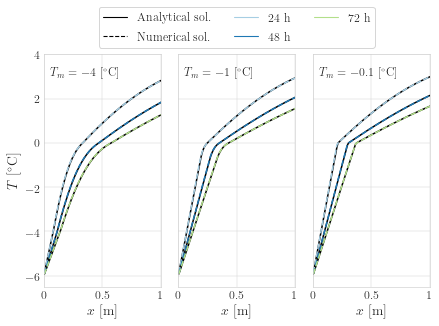

In [18]:
i_0 = 0
i_1 = 500
line_w = 1.5
line_s_a = '-'
line_s_num = '--'
color_a = 'black'
color_num = 'red'
color_num_1 = '#a6cee3'
color_num_2 = '#1f78b4'
color_num_3 = '#b2df8a'

fig, ax = plt.subplots(1, 3, sharey='row', figsize=(plot_width, plot_width/1.618))

#################################
#              Tm = -4
#################################

ax[0].plot(np.nan, np.nan, color='k', linestyle='-', linewidth = 1.1, label='Analytical sol.')
ax[0].plot(np.nan, np.nan, color='k', linestyle='--', linewidth = 1.1, label='Numerical sol.')
ax[0].plot(np.nan, np.nan, color=color_num_1, linestyle='-', linewidth = 1.1, label='24 h')
ax[0].plot(np.nan, np.nan, color=color_num_2, linestyle='-', linewidth = 1.1, label='48 h')
ax[0].plot(np.nan, np.nan, color=color_num_3, linestyle='-', linewidth = 1.1, label='72 h')

ax[0].plot(xx[i_0:i_1], T_24h_4[i_0:i_1], linestyle=line_s_a, linewidth=line_w, color= color_a)
ax[0].plot(xx[i_0:i_1], T_48h_4[i_0:i_1], linestyle=line_s_a, linewidth=line_w, color= color_a)
ax[0].plot(xx[i_0:i_1], T_72h_4[i_0:i_1], linestyle=line_s_a, linewidth=line_w, color= color_a) #, label='Analytical'

ax[0].plot(ds_4.z.values[i_0:i_1], ds_4.T.values[24-1,i_0:i_1]-273.15, linestyle=line_s_num, linewidth=line_w, color= color_num_1 ) #, label='24 h'
ax[0].plot(ds_4.z.values[i_0:i_1], ds_4.T.values[24*2-1,i_0:i_1]-273.15, linestyle=line_s_num, linewidth=line_w, color= color_num_2) #, label='48 h'
ax[0].plot(ds_4.z.values[i_0:i_1], ds_4.T.values[24*3-1,i_0:i_1]-273.15, linestyle=line_s_num, linewidth=line_w, color= color_num_3) #, label='72 h'

# ax[0].title.set_text('$T_m= -4$ [$^\circ$C]')

ax[0].set_ylabel('$T$ [$^\circ$C]')
ax[0].set_xlabel('$x$ [m]')
ax[0].set_xlim(0, 1);
ax[0].set_ylim(-6.5, 4);
ax[0].set_xticks([0,0.5,1])
ax[0].set_xticklabels(['$0$','$0.5$','$1$'])
ax[0].set_yticks(np.arange(-6., 6, 2.0))


#################################
#              Tm = -1
#################################

ax[1].plot(xx[i_0:i_1], T_24h_1[i_0:i_1], linestyle=line_s_a, linewidth=line_w, color= color_a)
ax[1].plot(xx[i_0:i_1], T_48h_1[i_0:i_1], linestyle=line_s_a, linewidth=line_w, color= color_a)
ax[1].plot(xx[i_0:i_1], T_72h_1[i_0:i_1], linestyle=line_s_a, linewidth=line_w, color= color_a)

ax[1].plot(ds_1.z.values[i_0:i_1], ds_1.T.values[24-1,i_0:i_1]-273.15,linestyle=line_s_num, linewidth=line_w, color= color_num_1)
ax[1].plot(ds_1.z.values[i_0:i_1], ds_1.T.values[24*2-1,i_0:i_1]-273.15,linestyle=line_s_num, linewidth=line_w, color= color_num_2)
ax[1].plot(ds_1.z.values[i_0:i_1], ds_1.T.values[24*3-1,i_0:i_1]-273.15,linestyle=line_s_num, linewidth=line_w, color= color_num_3)

# ax[1].title.set_text('$T_m= -1$ [$^\circ$C]')

ax[1].set_xlabel('$x$ [m]')
ax[1].set_xlim(0, 1);
ax[1].set_ylim(-6.5, 4);
ax[1].set_xticks([0,0.5,1])
ax[1].set_xticklabels(['$0$','$0.5$','$1$'])
ax[1].set_yticks(np.arange(-6., 6, 2.0))


#################################
#              Tm = -0.1
#################################

ax[2].plot(xx[i_0:i_1], T_24h_01[i_0:i_1], linestyle=line_s_a, linewidth=line_w, color= color_a)
ax[2].plot(xx[i_0:i_1], T_48h_01[i_0:i_1], linestyle=line_s_a, linewidth=line_w, color= color_a)
ax[2].plot(xx[i_0:i_1], T_72h_01[i_0:i_1], linestyle=line_s_a, linewidth=line_w, color= color_a)

ax[2].plot(ds_01.z.values[i_0:i_1], ds_01.T.values[24-1,i_0:i_1]-273.15,linestyle=line_s_num, linewidth=line_w, color= color_num_1)
ax[2].plot(ds_01.z.values[i_0:i_1], ds_01.T.values[24*2-1,i_0:i_1]-273.15,linestyle=line_s_num, linewidth=line_w, color= color_num_2)
ax[2].plot(ds_01.z.values[i_0:i_1], ds_01.T.values[24*3-1,i_0:i_1]-273.15,linestyle=line_s_num, linewidth=line_w, color= color_num_3)

# ax[2].title.set_text('$T_m= -0.1$ [$^\circ$C]')

ax[2].set_xlabel('$x$ [m]')
ax[2].set_xlim(0, 1);
ax[2].set_ylim(-6.5, 4);
ax[2].set_xticks([0,0.5,1])
ax[2].set_xticklabels(['$0$','$0.5$','$1$'])
ax[2].set_yticks(np.arange(-6., 6, 2.0))



lgd = ax[0].legend(bbox_to_anchor=(2.88,1.23), ncol=3)


plt.text( 0.05,0.9, '$T_m=-4$ [$^\circ$C]', fontsize=12,
             transform=ax[0].transAxes)
plt.text( 0.05,0.9, '$T_m=-1$ [$^\circ$C]', fontsize=12,
             transform=ax[1].transAxes)
plt.text( 0.05,0.9, '$T_m=-0.1$ [$^\circ$C]', fontsize=12,
             transform=ax[2].transAxes)

fig.subplots_adjust(wspace=0.15)
if(save_figure==True):
    fig.savefig(plot_folder+'/Lunardini_temperature.pdf', format='pdf', bbox_inches='tight')

## Freezing depth

In [13]:
def Lunardini_zero_isotherm(time, dt, gamma, alpha4):
    '''
    Function to compute the position of the freezing front, X(t)
    '''
    
    z_zero_isotherm = np.zeros(len(time))
    num_seconds = np.zeros(len(time))
    
    for t in range(0,len(time)):
    
        num_seconds[t] = dt*(t+1)
        z_zero_isotherm[t] = 2*gamma*np.sqrt(alpha4*num_seconds[t])
        
    return [z_zero_isotherm, num_seconds]

def zero_isotherm(time, dt, T, z):
    '''
    Function to compute the numerical solution of the the freezing front position. 
    '''
    num_z_zero_isotherm = np.zeros(len(time))
#     num_seconds = np.zeros(len(time))
    
    for t in range(0,len(time)):
    
#         num_seconds[t] = dt*(t+1)
        for k in range(0,len(T)):
            if T[t,k]>=273.15:
                m =  (T[t,k]-T[t,k-1])/(z[k]-z[k-1])
                q = T[t,k]  - m*z[k] 
                num_z_zero_isotherm[t] = (273.15 - T[t,k] + m*z[k])/m
                break
            else:
                num_z_zero_isotherm[t] = 0
    
    return num_z_zero_isotherm

In [14]:
num_freezing_front_4 = zero_isotherm(ds_4.time.values, 3600, ds_4.T.values, ds_4.z.values)
num_freezing_front_1 = zero_isotherm(ds_1.time.values, 3600, ds_1.T.values, ds_01.z.values)
num_freezing_front_01 = zero_isotherm(ds_01.time.values, 3600, ds_01.T.values, ds_01.z.values)

[freezing_front_4, time_sec] = Lunardini_zero_isotherm(ds_4.time.values, 3600, gamma_4, alpha4_4)
[freezing_front_1, time_sec] = Lunardini_zero_isotherm(ds_1.time.values, 3600, gamma_1, alpha4_1)
[freezing_front_01, time_sec] = Lunardini_zero_isotherm(ds_01.time.values, 3600, gamma_01, alpha4_01)


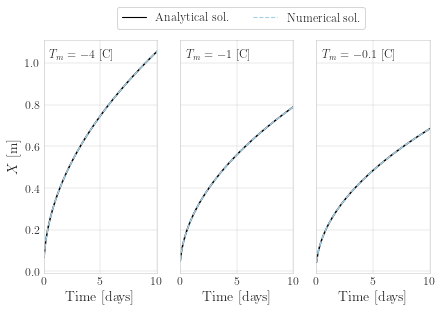

In [17]:
i_0 = 0
i_1 = 500
line_w = 1.5
line_s_a = '-'
line_s_num = '--'
color_a = 'black'
color_num = 'red'
color_num_1 = '#a6cee3'
color_num_2 = '#1f78b4'
color_num_3 = '#b2df8a'


fig, ax = plt.subplots(1, 3, sharey='row', figsize=(plot_width,plot_width/1.618))

#################################
#              Tm = -4
#################################

ax[0].plot(np.nan,np.nan, color='k', linestyle='-', linewidth = 1.1, label='Analytical sol.')
ax[0].plot(np.nan,np.nan, color=color_num_1, linestyle='--', linewidth = 1.1, label='Numerical sol.')

ax[0].plot(time_sec/(3600*24), freezing_front_4, linestyle=line_s_a, linewidth=line_w, color= color_a) #, label='Analytical'
ax[0].plot(time_sec/(3600*24), freezing_front_4, linestyle=line_s_num, linewidth=line_w, color= color_num_1) #  , label='Numerical'

# ax[0].title.set_text('$T_m= -4$ [$^\circ$C]')


ax[0].set_ylabel('$X$ [m]')
ax[0].set_xlabel('Time [days]')
ax[0].set_xlim(0, 10);
# ax[0].set_ylim(-6, 4);
ax[0].set_xticks(np.arange(0, 11, 5))
# ax[0].set_yticks(np.arange(-6, 6, 2.0))


#################################
#              Tm = -1
#################################

ax[1].plot(time_sec/(3600*24), freezing_front_1, linestyle=line_s_a, linewidth=line_w, color= color_a)
ax[1].plot(time_sec/(3600*24), freezing_front_1, linestyle=line_s_num, linewidth=line_w, color= color_num_1)

# ax[1].title.set_text('$T_m= -1$ [$^\circ$C]')


ax[1].set_xlabel('Time [days]')
ax[1].set_xlim(0, 10);
ax[1].set_xticks(np.arange(0, 11, 5))

#################################
#              Tm = -0.1
#################################

ax[2].plot(time_sec/(3600*24), freezing_front_01, linestyle=line_s_a, linewidth=line_w, color= color_a)
ax[2].plot(time_sec/(3600*24), freezing_front_01,linestyle=line_s_num, linewidth=line_w, color= color_num_1)

# ax[2].title.set_text('$T_m= -0.1$ [$^\circ$C]')

# ax[2].set_ylabel('Temperature [C]')
ax[2].set_xlabel('Time [days]')
ax[2].set_xlim(0, 10);
# ax[2].set_ylim(-6, 4);
ax[2].set_xticks(np.arange(0, 11, 5))
# ax[2].set_yticks(np.arange(-6, 6, 2.0))

lgd = ax[0].legend(bbox_to_anchor=(2.88,1.17),ncol=2)

plt.text( 0.05,0.92, '$T_m=-4$ [C]', fontsize=12,
             transform=ax[0].transAxes)
plt.text( 0.05,0.92, '$T_m=-1$ [C]', fontsize=12,
             transform=ax[1].transAxes)
plt.text( 0.05,0.92, '$T_m=-0.1$ [C]', fontsize=12,
             transform=ax[2].transAxes)

# fig.subplots_adjust(wspace=0.15)
if(save_figure==True):
    fig.savefig(plot_folder+'/Lunardini_freezing_front.pdf', format='pdf', bbox_inches='tight')